#### import the required library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#### load the dataset

In [2]:
df = pd.read_csv('D:\\Datasets\\whetherAus\\weatherAUS.csv')

#### Dimension of Data-Set

In [3]:
print(f'No. of Rows : {df.shape[0]} \nNo. of Columns : {df.shape[1]}')

No. of Rows : 142193 
No. of Columns : 24


#### Drop RISK_MM feature

In [4]:
df.drop(labels='RISK_MM', axis=1, inplace=True)

#### preview of Data set

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Column Name in Data-set

In [6]:
print(df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


#### summary of Data-set

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

#### Statistical description of Dataset

In [8]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,...,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2016-05-11,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,...,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,...,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,NaN


#### Explore 'RainTomorrow' target variable

In [9]:
print(f"Target variable contains '{df['RainTomorrow'].isnull().sum()}' null values")

Target variable contains '0' null values


In [10]:
print('Data type of target feature : ', df['RainTomorrow'].dtype)

Data type of target feature :  object


In [11]:
print('Total number of unique values in target feature : ', df['RainTomorrow'].nunique())

Total number of unique values in target feature :  2


In [12]:
print('Unique values in target feature : ', df['RainTomorrow'].unique())

Unique values in target feature :  ['No' 'Yes']


In [13]:
print('Count of each values in target feature  :\n',df['RainTomorrow'].value_counts())

Count of each values in target feature  :
 No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


In [14]:
print('percentage of each values in target feature  :\n',df['RainTomorrow'].value_counts()/len(df['RainTomorrow']) * 100)

percentage of each values in target feature  :
 No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64


##### visualizing the target feature

Text(0.5, 1.0, 'frequency count of Target Feature')

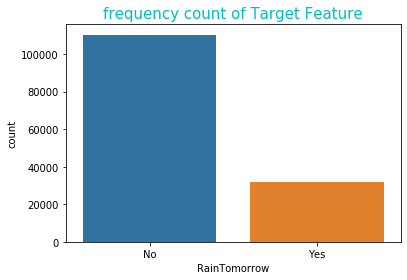

In [15]:
sns.countplot(x='RainTomorrow', data=df)
plt.title('frequency count of Target Feature', fontsize=15, color='c')

Text(0.5, 1.0, 'Frequency Distribution of target feature')

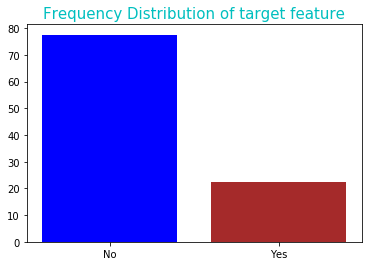

In [16]:
plt.bar(x=(df['RainTomorrow'].unique()), height=(df['RainTomorrow'].value_counts()/len(df['RainTomorrow']) * 100), color = ['blue', 'brown'])
plt.title('Frequency Distribution of target feature', fontsize=15, color='c')

#### Explore Categorical features

In [17]:
categorical = [col for col in df.columns if df[col].dtype=='O']

In [18]:
print('Total categorical features in Data set : ', len(categorical))

Total categorical features in Data set :  7


In [19]:
print('Categorical features are : \n', categorical)

Categorical features are : 
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


##### parse Date feature from object to date_time_index

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
categorical = [col for col in df.columns if df[col].dtype=='O']

In [22]:
print('Total categorical features in Data set : ', len(categorical))
print('Categorical features are : \n', categorical)

Total categorical features in Data set :  6
Categorical features are : 
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [23]:
df[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


#### Null values in categorical features

In [24]:
df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

#### Frequency count of Categorical variable

In [25]:
for var in categorical:
    print(df[var].value_counts())
    print('\n=====================================================================\n')

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [26]:
#### Visualizing categorical feature

Location feature has  49  lables
Labels of Location feature : 

 ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


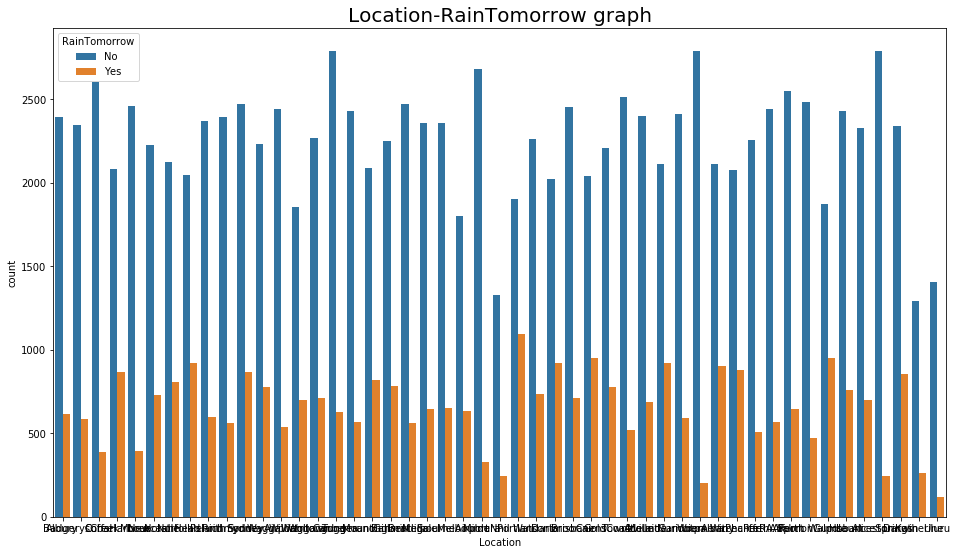



WindGustDir feature has  17  lables
Labels of WindGustDir feature : 

 ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']


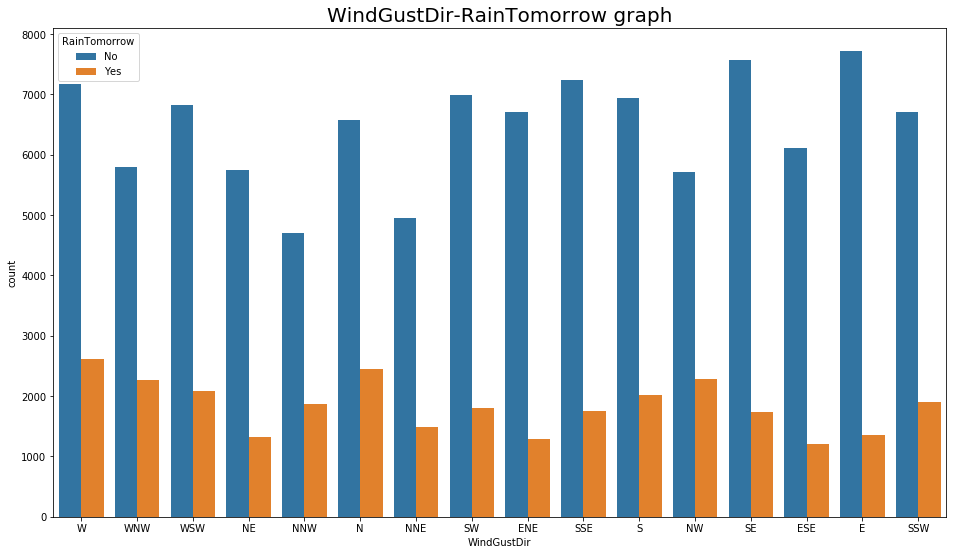



WindDir9am feature has  17  lables
Labels of WindDir9am feature : 

 ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']


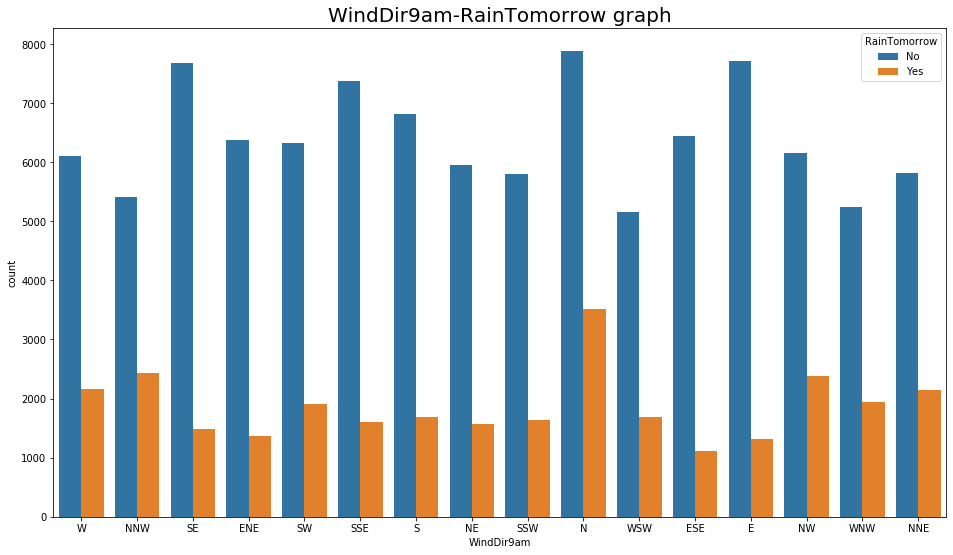



WindDir3pm feature has  17  lables
Labels of WindDir3pm feature : 

 ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']


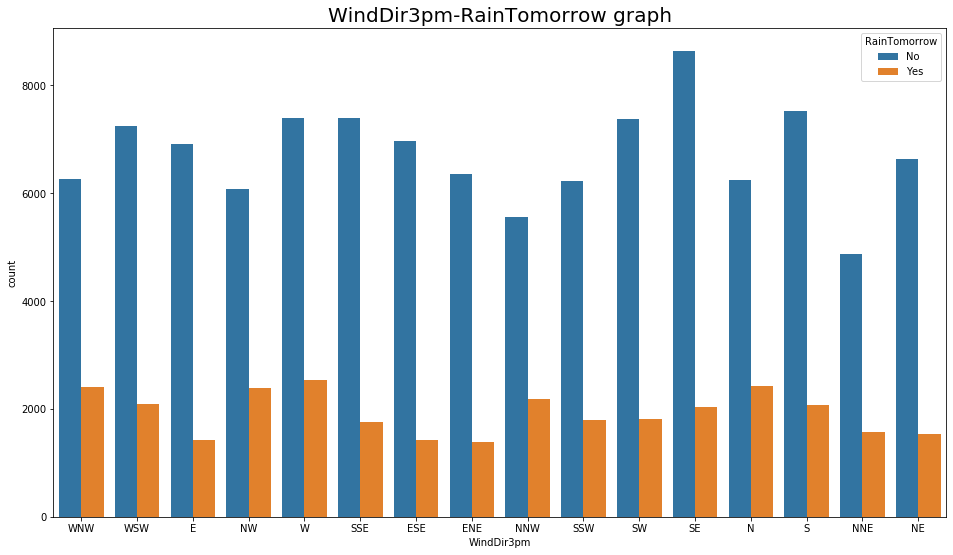



RainToday feature has  3  lables
Labels of RainToday feature : 

 ['No' 'Yes' nan]


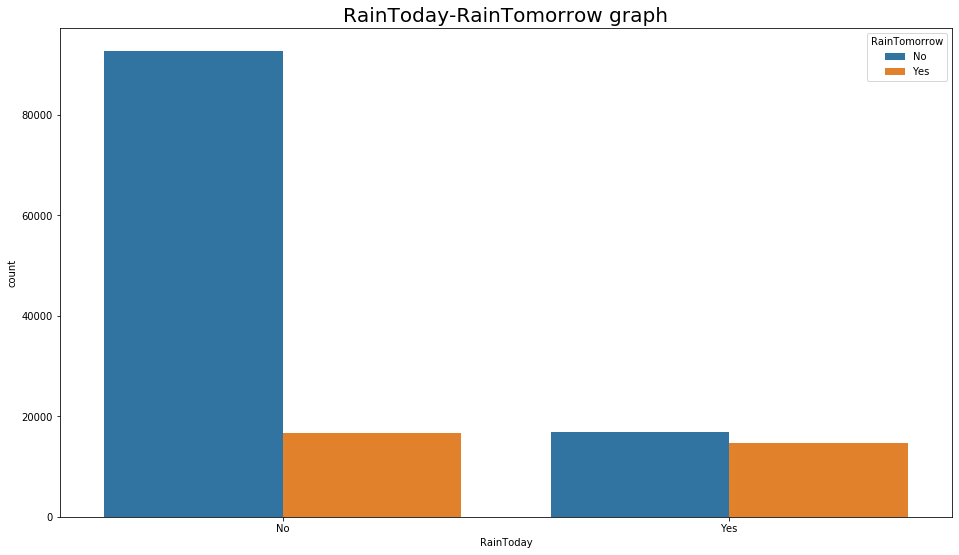



RainTomorrow feature has  2  lables
Labels of RainTomorrow feature : 

 ['No' 'Yes']


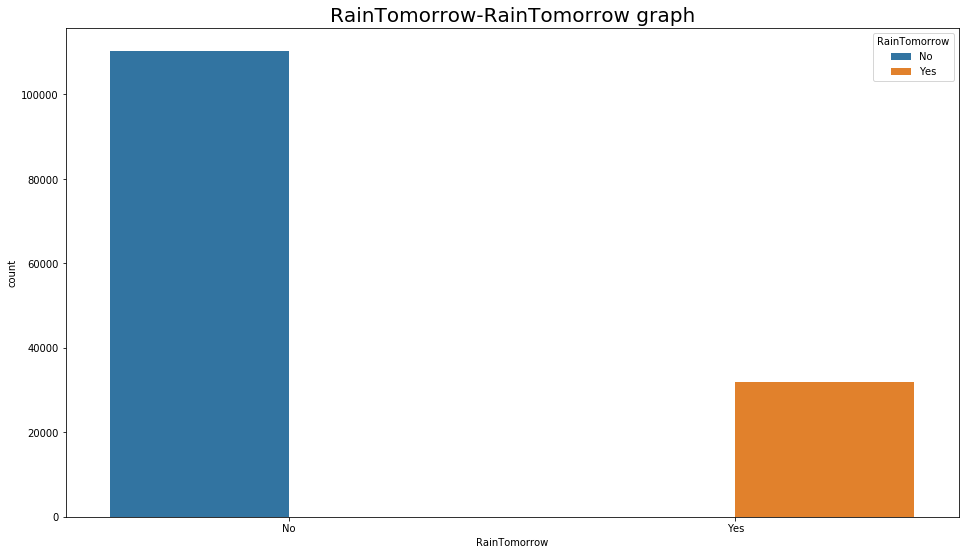

In [27]:
for var, val in zip(categorical, range(1,8)):
    print(f'{var} feature has ',len(df[var].unique()),' lables')
    print(f'Labels of {var} feature : \n\n', df[var].unique())    
    plt.figure(figsize=(16,9))
    plt.subplot = val,1,1
    sns.countplot(x=var, hue='RainTomorrow', data=df)
    plt.title(f"{var}-RainTomorrow graph", fontsize = 20)
    plt.show()
    print('\n===========================================================================================================\n')

#### feature engineering on Date feature 

In [28]:
df['Day'] = df['Date'].dt.day

In [29]:
df['Month'] = df['Date'].dt.month

In [30]:
df['Year'] = df['Date'].dt.year

In [31]:
df.drop(labels='Date', axis=1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RainTomorrow     142193 non-null obje

#### Explore features which has Continuous Data

In [33]:
numerical = [col for col in df.columns if df[col].dtype !='O']

In [34]:
print('Total numerical features in Data set : ', len(numerical))

Total numerical features in Data set :  19


In [35]:
print('numerical features are : \n', numerical)

numerical features are : 
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [36]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,1,12,2008
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2,12,2008
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,3,12,2008
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,4,12,2008
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,5,12,2008


#### Count null values in Numerical features

In [37]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Day                  0
Month                0
Year                 0
dtype: int64

#### Statistical description of numerical features

In [38]:
round(df.describe(), 3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,141556.000,141871.000,140787.000,81350.000,74377.000,132923.000,140845.000,139563.000,140419.000,138583.000,128179.000,128212.000,88536.000,85099.000,141289.000,139467.000,142193.000,142193.000,142193.000
mean,12.186,23.227,2.350,5.470,7.625,39.984,14.002,18.638,68.844,51.483,1017.654,1015.258,4.437,4.503,16.988,21.687,15.715,6.403,2012.759
std,6.403,7.118,8.465,4.189,3.782,13.589,8.893,8.803,19.051,20.798,7.105,7.037,2.887,2.721,6.493,6.938,8.798,3.427,2.541
min,-8.500,-4.800,0.000,0.000,0.000,6.000,0.000,0.000,0.000,0.000,980.500,977.100,0.000,0.000,-7.200,-5.400,1.000,1.000,2007.000
25%,7.600,17.900,0.000,2.600,4.900,31.000,7.000,13.000,57.000,37.000,1012.900,1010.400,1.000,2.000,12.300,16.600,8.000,3.000,2011.000
50%,12.000,22.600,0.000,4.800,8.500,39.000,13.000,19.000,70.000,52.000,1017.600,1015.200,5.000,5.000,16.700,21.100,16.000,6.000,2013.000
75%,16.800,28.200,0.800,7.400,10.600,48.000,19.000,24.000,83.000,66.000,1022.400,1020.000,7.000,7.000,21.600,26.400,23.000,9.000,2015.000
max,33.900,48.100,371.000,145.000,14.500,135.000,130.000,87.000,100.000,100.000,1041.000,1039.600,9.000,9.000,40.200,46.700,31.000,12.000,2017.000


#### visualization of numerical features 

#### plotting box-plot

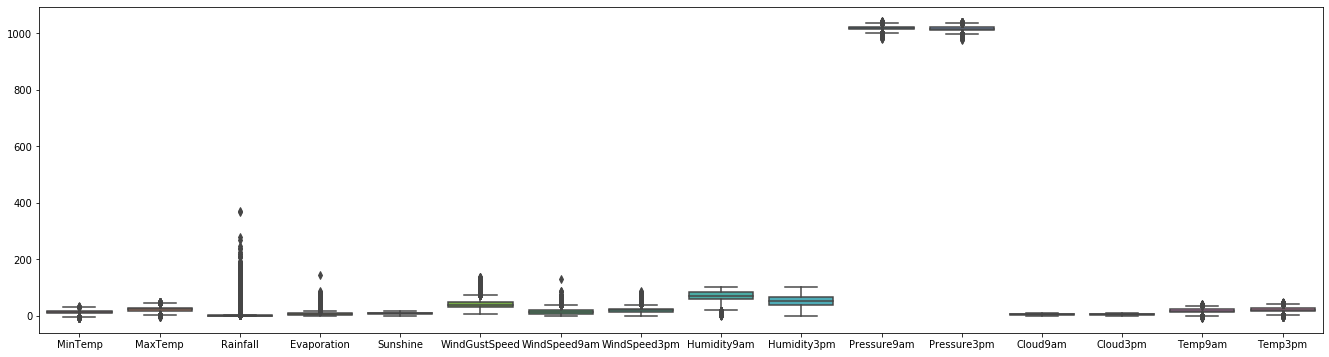

In [39]:
plt.figure(figsize=(23,6))
num1 = [col for col in df.columns if df[col].dtype =='float64']
sns.boxplot(data=df[num1])

In [40]:
#### plot histogram for visualizing distribution

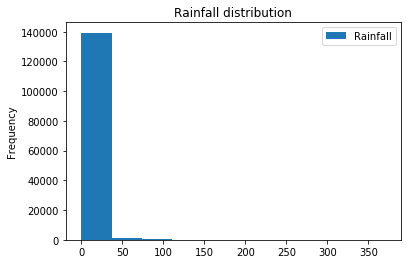

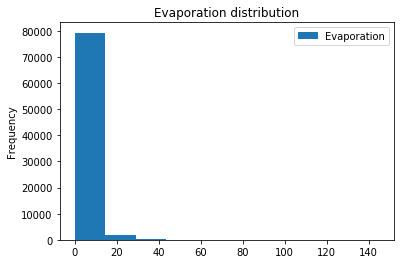

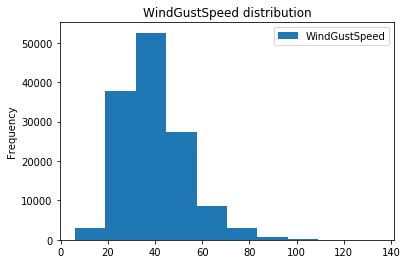

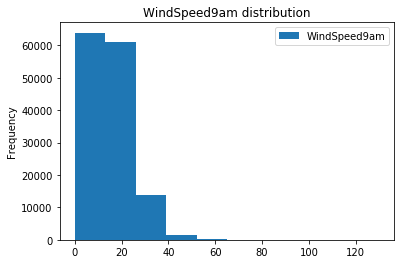

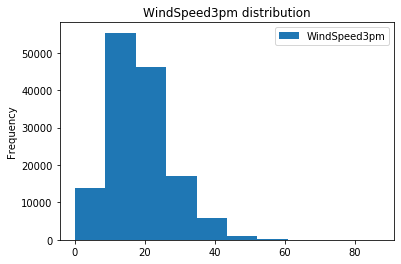

In [41]:
out = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
for col, val in zip(out, range(1,6)):
    plt.subplot = val, 1, 1
    df[[col]].plot(kind='hist')
    plt.title(f'{col} distribution')

#### measuring IQR of these features to deal with outliers.

In [42]:
rang = {}
for col in out:
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3-q1
    lower_fence = q1 - iqr*3
    upper_fence = q3 + iqr*3
    rang[col] = {'lower_boundary' : lower_fence, 'upper_boundary' : upper_fence}

#### inter-quartile range of features that may have outliers

In [43]:
ran = pd.DataFrame(rang).T

In [44]:
ran

,lower_boundary,upper_boundary
Rainfall,-2.4,3.2
Evaporation,-11.8,21.8
WindGustSpeed,-20.0,99.0
WindSpeed9am,-29.0,55.0
WindSpeed3pm,-20.0,57.0


#### check correlation between features

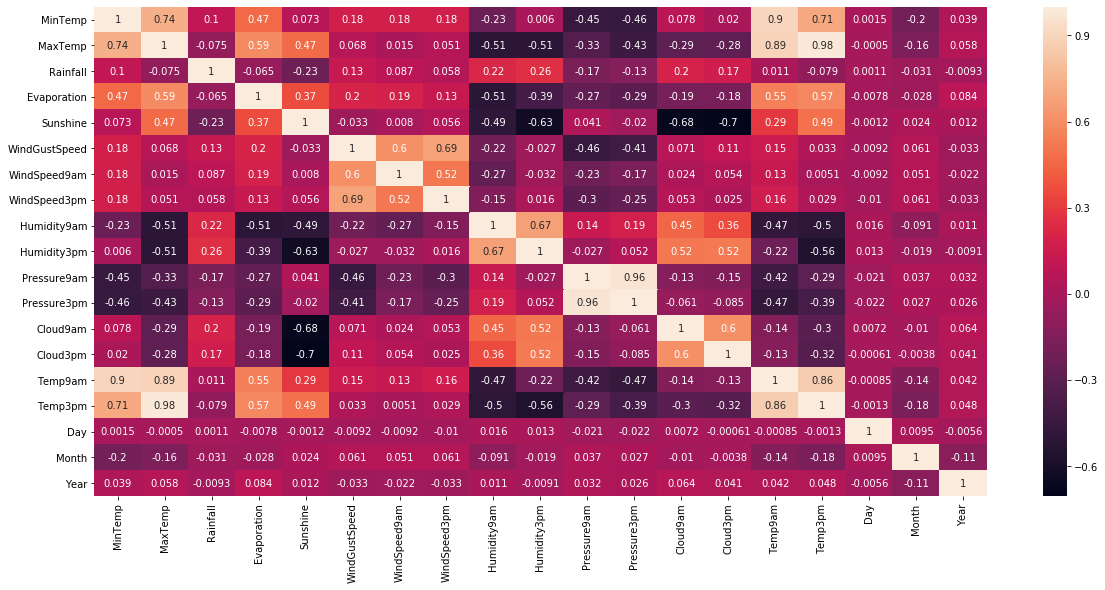

In [45]:
plt.figure(figsize=(20,9))
sns.heatmap(data=df.corr(), annot=True,)

#### pairplot between highly correleated features

In [46]:
highly_corr = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'Sunshine', 'Cloud3pm', 'Cloud9am']

C:\Users\Sunny\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Sunny\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


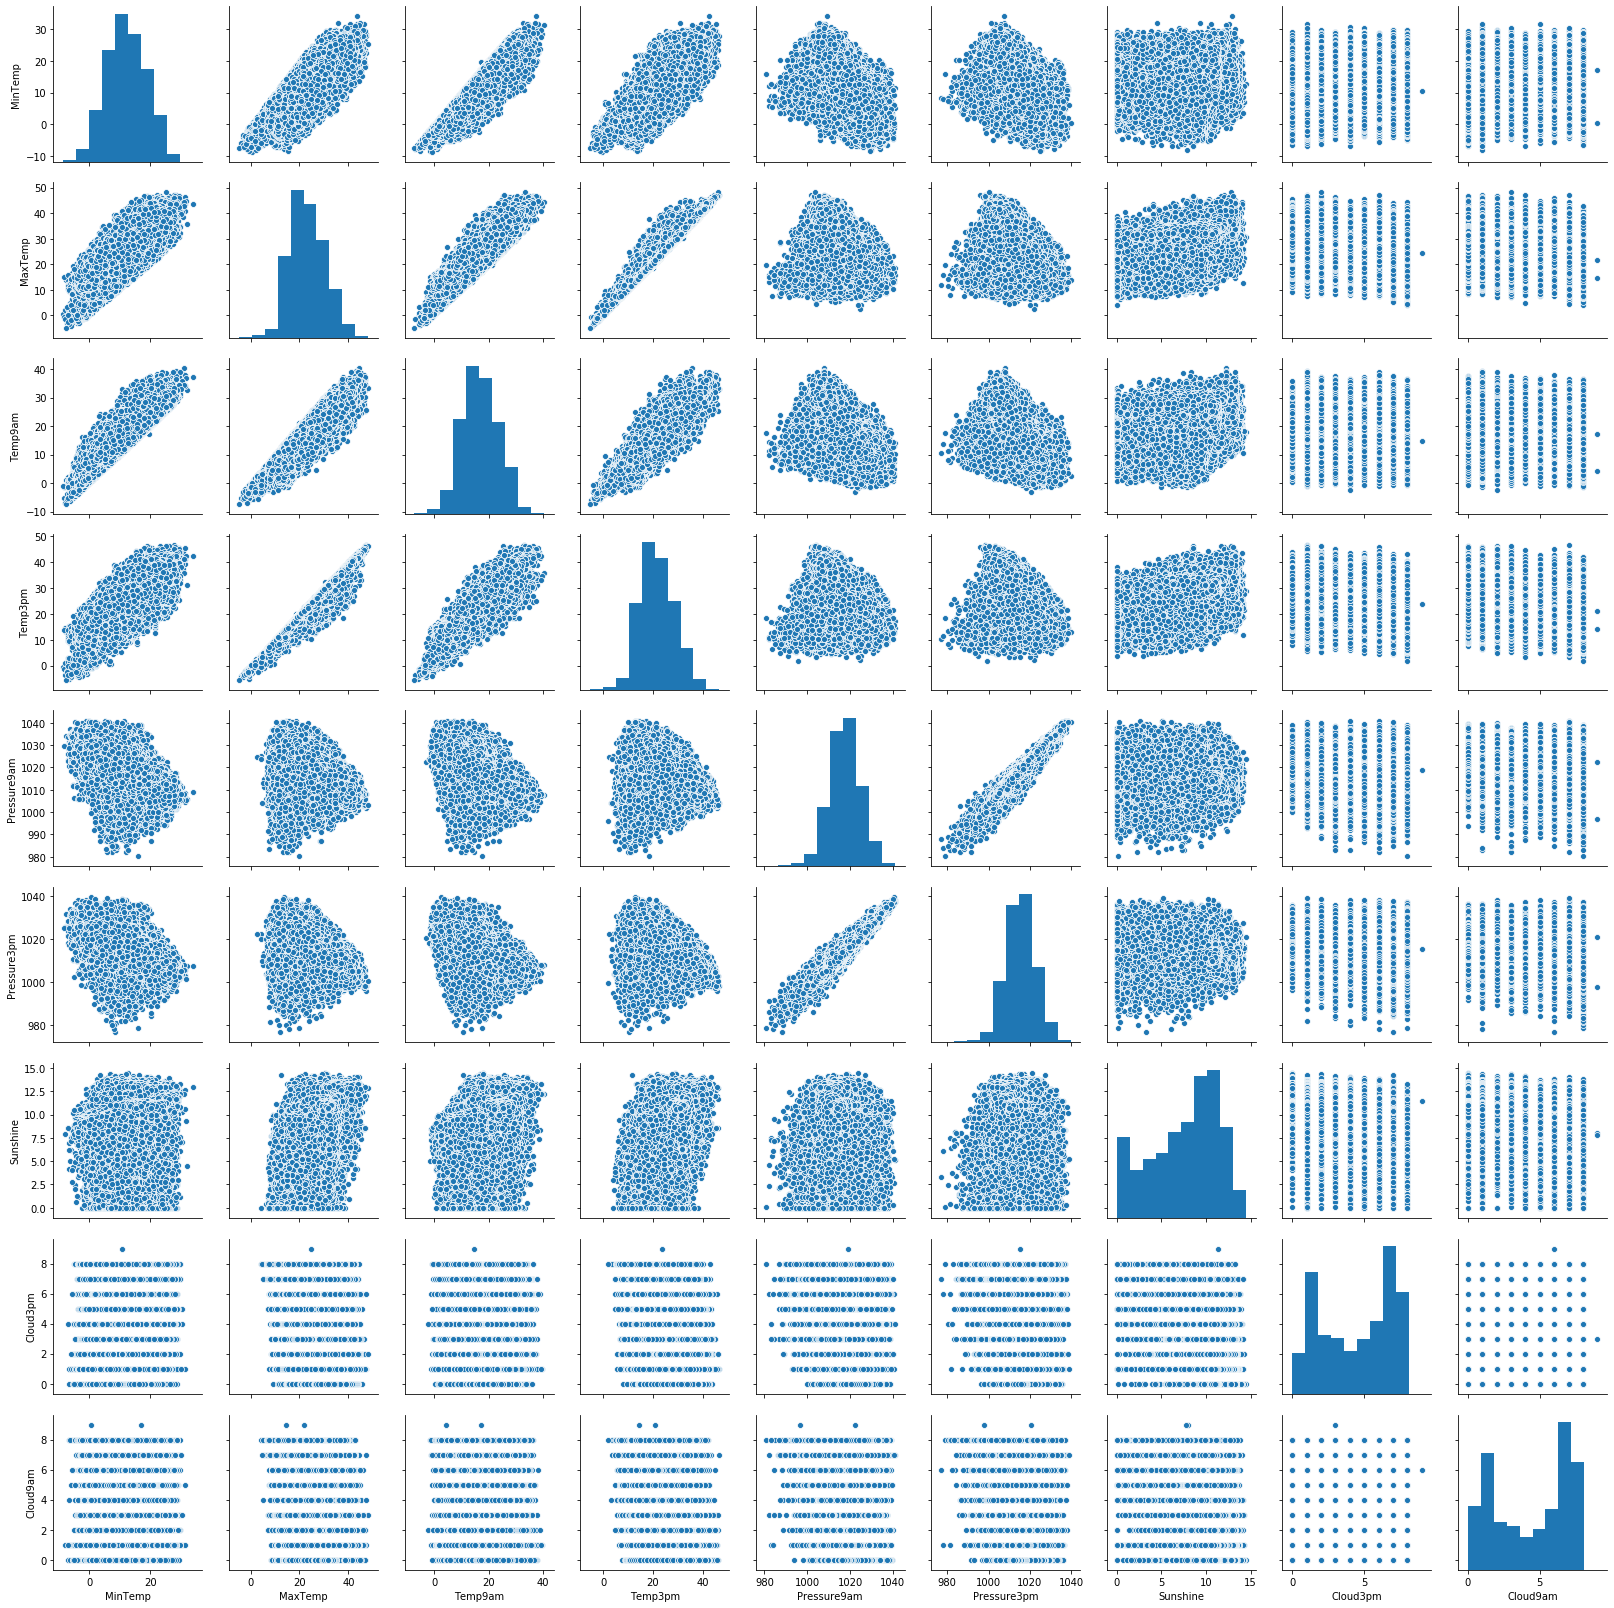

In [47]:
sns.pairplot(data=df[highly_corr],)

#### seprate predictor and target feature from dataset

In [47]:
x = df.drop(labels='RainTomorrow', axis=1,)
y = df['RainTomorrow']

#### split data into training and test set

In [48]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [49]:
print('Shape of train_x : ', train_x.shape,'||  Shape of test_x : ', test_x.shape)
print('Shape of train_y : ', train_y.shape,'||  Shape of test_y : ', test_y.shape)


Shape of train_x :  (113754, 24) ||  Shape of test_x :  (28439, 24)
Shape of train_y :  (113754,) ||  Shape of test_y :  (28439,)


### Feature Engineering

#### Datatypes of train_x data

In [50]:
train_x.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Day                int64
Month              int64
Year               int64
dtype: object

#### count Null value in train_x and test_x

In [51]:
i_v = [train_x, test_x]
name = ['train_x', 'test_x']
for i,j in zip(i_v, name):
    print(f'Null values in {j} data : \n{i.isnull().sum()}')
    print('\n======================================================================\n')

Null values in train_x data : 
Location             0
MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustDir       7407
WindGustSpeed     7367
WindDir9am        7978
WindDir3pm        3008
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
RainToday         1139
Day                  0
Month                0
Year                 0
dtype: int64


Null values in test_x data : 
Location             0
MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustDir       1923
WindGustSpeed     1903
WindDir9am        2035
WindDir3pm         770
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Clou

#### categorical and continuous features in train and test data set

In [52]:
categorical = [col for col in train_x.columns if train_x[col].dtype == 'O']
numerical = [col for col in train_x.columns if train_x[col].dtype != 'O']

In [53]:
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

#### count null values in features that has numerical data 

In [54]:
for i,j in zip(i_v, name):
    print(f'Null values in {j} data : \n{i[numerical].isnull().sum()}')
    print('\n======================================================================\n')    

Null values in train_x data : 
MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Day                  0
Month                0
Year                 0
dtype: int64


Null values in test_x data : 
MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Day                  0
Month                0
Year                 0
dtype: int64




#### filling Null values in both training and test

In [55]:
for i in i_v:
    for col in numerical:
        if i[col].isnull().sum() > 0:
            medain = train_x[col].median()
            i[col].fillna(medain, inplace=True)

C:\Users\Sunny\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### cross check the count of null values in traing and test data 

In [56]:
for i,j in zip(i_v, name):
    print(f'count of Null values in {j} : \n{i[numerical].isnull().sum()}')
    print('\n=======================================================\n')

count of Null values in train_x : 
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64


count of Null values in test_x : 
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64




#### count null values in features that has categorical data 

In [57]:
for i,j in zip(i_v, name):
    print(f'count of Null values in {j} : \n{i[categorical].isnull().sum()}')
    print('\n=======================================================\n')

count of Null values in train_x : 
Location          0
WindGustDir    7407
WindDir9am     7978
WindDir3pm     3008
RainToday      1139
dtype: int64


count of Null values in test_x : 
Location          0
WindGustDir    1923
WindDir9am     2035
WindDir3pm      770
RainToday       267
dtype: int64




#### Filling null values in training and test set

In [58]:
for i in i_v:
    for col in categorical:
        if i[col].isnull().sum() > 0:
            mod = train_x[col].mode()
            i[col].fillna(mod[0], inplace = True)

#### cross check the count of null values in traing and test data 

In [59]:
for i,j in zip(i_v, name):
    print(f'count of Null values in {j} : \n{i[categorical].isnull().sum()}')
    print('\n=======================================================\n')

count of Null values in train_x : 
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64


count of Null values in test_x : 
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64




In [60]:
#### Count null values in train and test set

In [61]:
for i,j in zip(i_v, name):
    print(f'count of Null values in {j} : \n{i.isnull().sum()}')
    print('\n=======================================================\n')

count of Null values in train_x : 
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Day              0
Month            0
Year             0
dtype: int64


count of Null values in test_x : 
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Day              0
Month            0
Year             0
dtyp

### Deal with outliers 

#### Engineering outliers in numerical variables

In [62]:
print('Features that have outliers : \n',out)

Features that have outliers : 
 ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']


#### upper range of these feature

In [63]:
for i in out:
    print(i, ': ', ran.loc[i]['upper_boundary'])

Rainfall :  3.2
Evaporation :  21.800000000000004
WindGustSpeed :  99.0
WindSpeed9am :  55.0
WindSpeed3pm :  57.0


#### make a Function named with deal_outlier 

In [64]:
def deal_outlier(df, upper_range, variable):
    return np.where(df[variable] > upper_range, upper_range, df[variable])

In [65]:
for i in i_v:
    for col in out:
        upper_range = ran.loc[col]['upper_boundary']
        i[col] = deal_outlier(df=i, upper_range= upper_range, variable=col)

C:\Users\Sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [66]:
#### Check the statistical description of each data set

In [67]:
train_x.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.875925,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,15.710419,6.404021,2012.759727
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.075585,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,8.796821,3.427798,2.540419
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,1.000000,1.000000,2007.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,8.000000,3.000000,2011.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,23.000000,9.000000,2015.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,99.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,31.000000,12.000000,2017.000000


In [68]:
test_x.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000
mean,12.153835,23.177960,0.677580,5.122715,8.046566,40.055487,14.027533,18.742677,68.821231,51.440522,1017.679704,1015.297999,4.640634,4.698935,16.948156,21.625314,15.733746,6.396638,2012.755723
std,6.391574,7.171085,1.185435,2.772555,2.770314,13.189235,8.902330,8.764068,18.920495,20.538509,6.776560,6.708235,2.300889,2.122408,6.505813,6.933155,8.803594,3.421386,2.544643
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,982.000000,978.200000,0.000000,0.000000,-5.900000,-5.100000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.200000,16.600000,8.000000,3.000000,2010.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.500000,6.000000,6.000000,21.500000,26.300000,23.000000,9.000000,2015.000000
max,31.400000,46.700000,3.200000,21.800000,14.300000,99.000000,55.000000,57.000000,100.000000,100.000000,1040.900000,1038.200000,8.000000,9.000000,39.100000,46.100000,31.000000,12.000000,2017.000000


In [69]:
train_x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
110803,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,1013.9,1013.4,5.0,5.0,18.8,20.4,No,25,4,2014
87289,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1016.9,1013.1,7.0,5.0,26.4,27.5,Yes,2,11,2015
134949,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1018.1,1013.6,1.0,1.0,28.5,35.0,No,19,10,2014
85553,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1014.1,1010.8,2.0,3.0,27.3,29.4,No,30,10,2010
16110,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,1017.6,1015.2,5.0,8.0,22.2,27.0,No,8,11,2012


#### Feature Engineering on Categorical data

In [70]:
dummy_train = pd.get_dummies(train_x[categorical], drop_first=True)

In [71]:
dummy_train.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
110803,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
87289,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
134949,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85553,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16110,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
dummy_test = pd.get_dummies(test_x[categorical], drop_first=True)

In [73]:
dummy_test.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
86232,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
57576,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
124071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
117955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
133468,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### drop categorical features from tarin and test data set

In [74]:
train_x.drop(labels=train_x[categorical], inplace=True, axis=1)

C:\Users\Sunny\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [75]:
train_x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
110803,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,1013.9,1013.4,5.0,5.0,18.8,20.4,25,4,2014
87289,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,1016.9,1013.1,7.0,5.0,26.4,27.5,2,11,2015
134949,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,1018.1,1013.6,1.0,1.0,28.5,35.0,19,10,2014
85553,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,1014.1,1010.8,2.0,3.0,27.3,29.4,30,10,2010
16110,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,1017.6,1015.2,5.0,8.0,22.2,27.0,8,11,2012


In [76]:
test_x.drop(labels=test_x[categorical], inplace=True, axis=1)

In [77]:
test_x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
86232,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,9,10,2012
57576,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,24,5,2011
124071,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,1014.4,1016.1,5.0,5.0,12.3,13.0,6,8,2009
117955,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,6,3,2009
133468,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,2,7,2010


#### Concat the Dummy data set with respective data set 

In [78]:
train_x = pd.concat([train_x, dummy_train], axis=1,)

In [79]:
test_x = pd.concat([test_x, dummy_test], axis=1,)

#### print the head of both data set

In [80]:
train_x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
110803,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,1,0,0,0,0,0,0,0,0
87289,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,1,0,0,0,0,0,0,1
134949,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
85553,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16110,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
test_x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
86232,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
57576,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,0,1,0,0,0,0,0,0,0,0
124071,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,0,1,0,0,0,0,0,1
117955,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,1,0,0,0,0
133468,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,1


#### visualizing some features of train set 

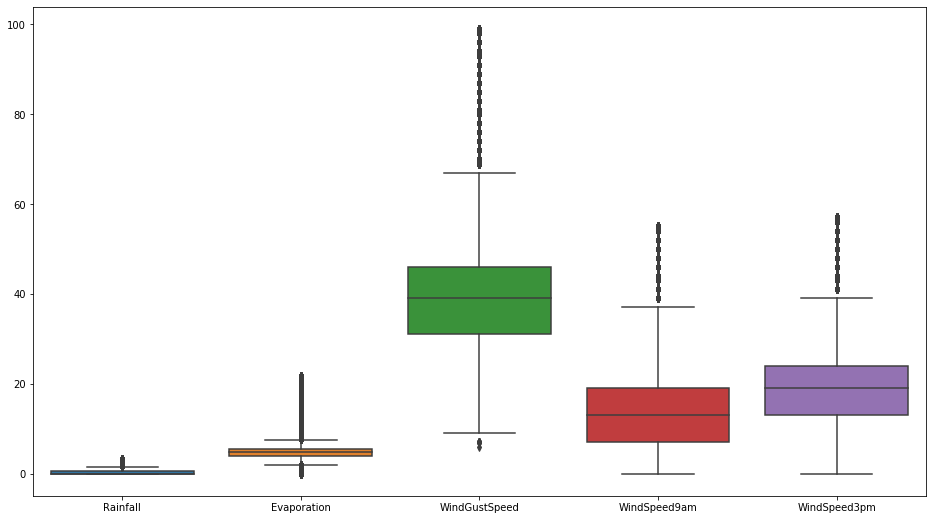

In [82]:
plt.figure(figsize=(16,9))
sns.boxplot(data=train_x[out], )

#### Feature scaling to make every feature in same scale.

In [83]:
ss = MinMaxScaler()

In [84]:
train_x = ss.fit_transform(train_x)

In [85]:
test_x = ss.transform(test_x)

#### I'm going to choose SVM Classifier to fit the model.

In [86]:
svc = SVC(C=0.01, kernel='sigmoid',)

In [88]:
svc.fit(train_x, train_y)

C:\Users\Sunny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [89]:
y_pred = svc.predict(test_x)

In [90]:
svc.score(train_x, train_y)

0.7757881041545792

In [ ]:
accuracy_score(test_y, y_pred)

In [92]:
# from sklearn.feature_selection import RFECV
# svc1 = SVC(C=0.01, kernel='linear',)

In [93]:
# rfecv = RFECV(estimator=svc1, cv=5, scoring='accuracy')

In [ ]:
# rfecv.fit(train_x, train_y)

In [ ]:
# c = [0.001, 0.01, 1, 10, 100]
# kernel = ['linear', 'poly', 'rbf', 'sigmoid']
# acc = []
# for k in kernel:
#     dic = {}
#     ar =[]
#     for ci in c:
#         svc = SVC(C=ci, kernel=k,)
#         svc.fit(train_x, train_y)
#         y_pred = svc.predict(test_x)
#         accuracy = accuracy_score(test_y, y_pred)
#         di ={}
#         di[ci] = accuracy
#         ar.append(di)
#     dic[k] = ar
#     acc.append(dic)  

#### SVM model with PCA

In [88]:
from sklearn.decomposition import PCA

In [89]:
pc = PCA(n_components=2,)

In [90]:
pc.fit(train_x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [92]:
pc_train_x = pc.transform(train_x)

In [93]:
pc_test_x = pc.transform(test_x)

In [95]:
svc.fit(pc_train_x, train_y)

C:\Users\Sunny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [98]:
pc_y_pred = svc.predict(pc_test_x)

In [99]:
accuracy_score(test_y, pc_y_pred)

0.7496395794507542